In [1]:
%cd ..

/Users/pedrobedmar/GoogleDrive/MASTER_BIG_DATA/tfm/code


In [4]:
from etl.esios.provider import ESIOSDataProvider
from etl.generic_provider import GenericDataProvider

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sktime.utils.plotting import plot_series, plot_correlations
from matplotlib.pyplot import figure

In [5]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [39]:
esios_provider = ESIOSDataProvider()

esios_df_yearly =esios_provider.get_all_series(freq="H", start_index="2014-01-01 00:00", resample_by="Y", group_mode="mean")
esios_df_sum_yearly =esios_provider.get_all_series(freq="H", start_index="2014-01-01 00:00", end_index="2022-12-31 23:59", resample_by="Y", group_mode="sum")

In [40]:
esios_spot_yearly = esios_df_yearly["PRECIO_MERCADO_SPOT_DIARIO"]
esios_demand_yearly = esios_df_sum_yearly["DEMANDA_REAL"]

In [41]:
omie_provider = GenericDataProvider("datalake/clean/omie/", want_metadata=False, tickers="PRECIO_OMIE")

omie_price_yearly = omie_provider.get_series("PRECIO_OMIE", freq="H", resample_by="Y", group_mode="mean")

Text(0.5, 1.0, 'SPOT market price (year)')

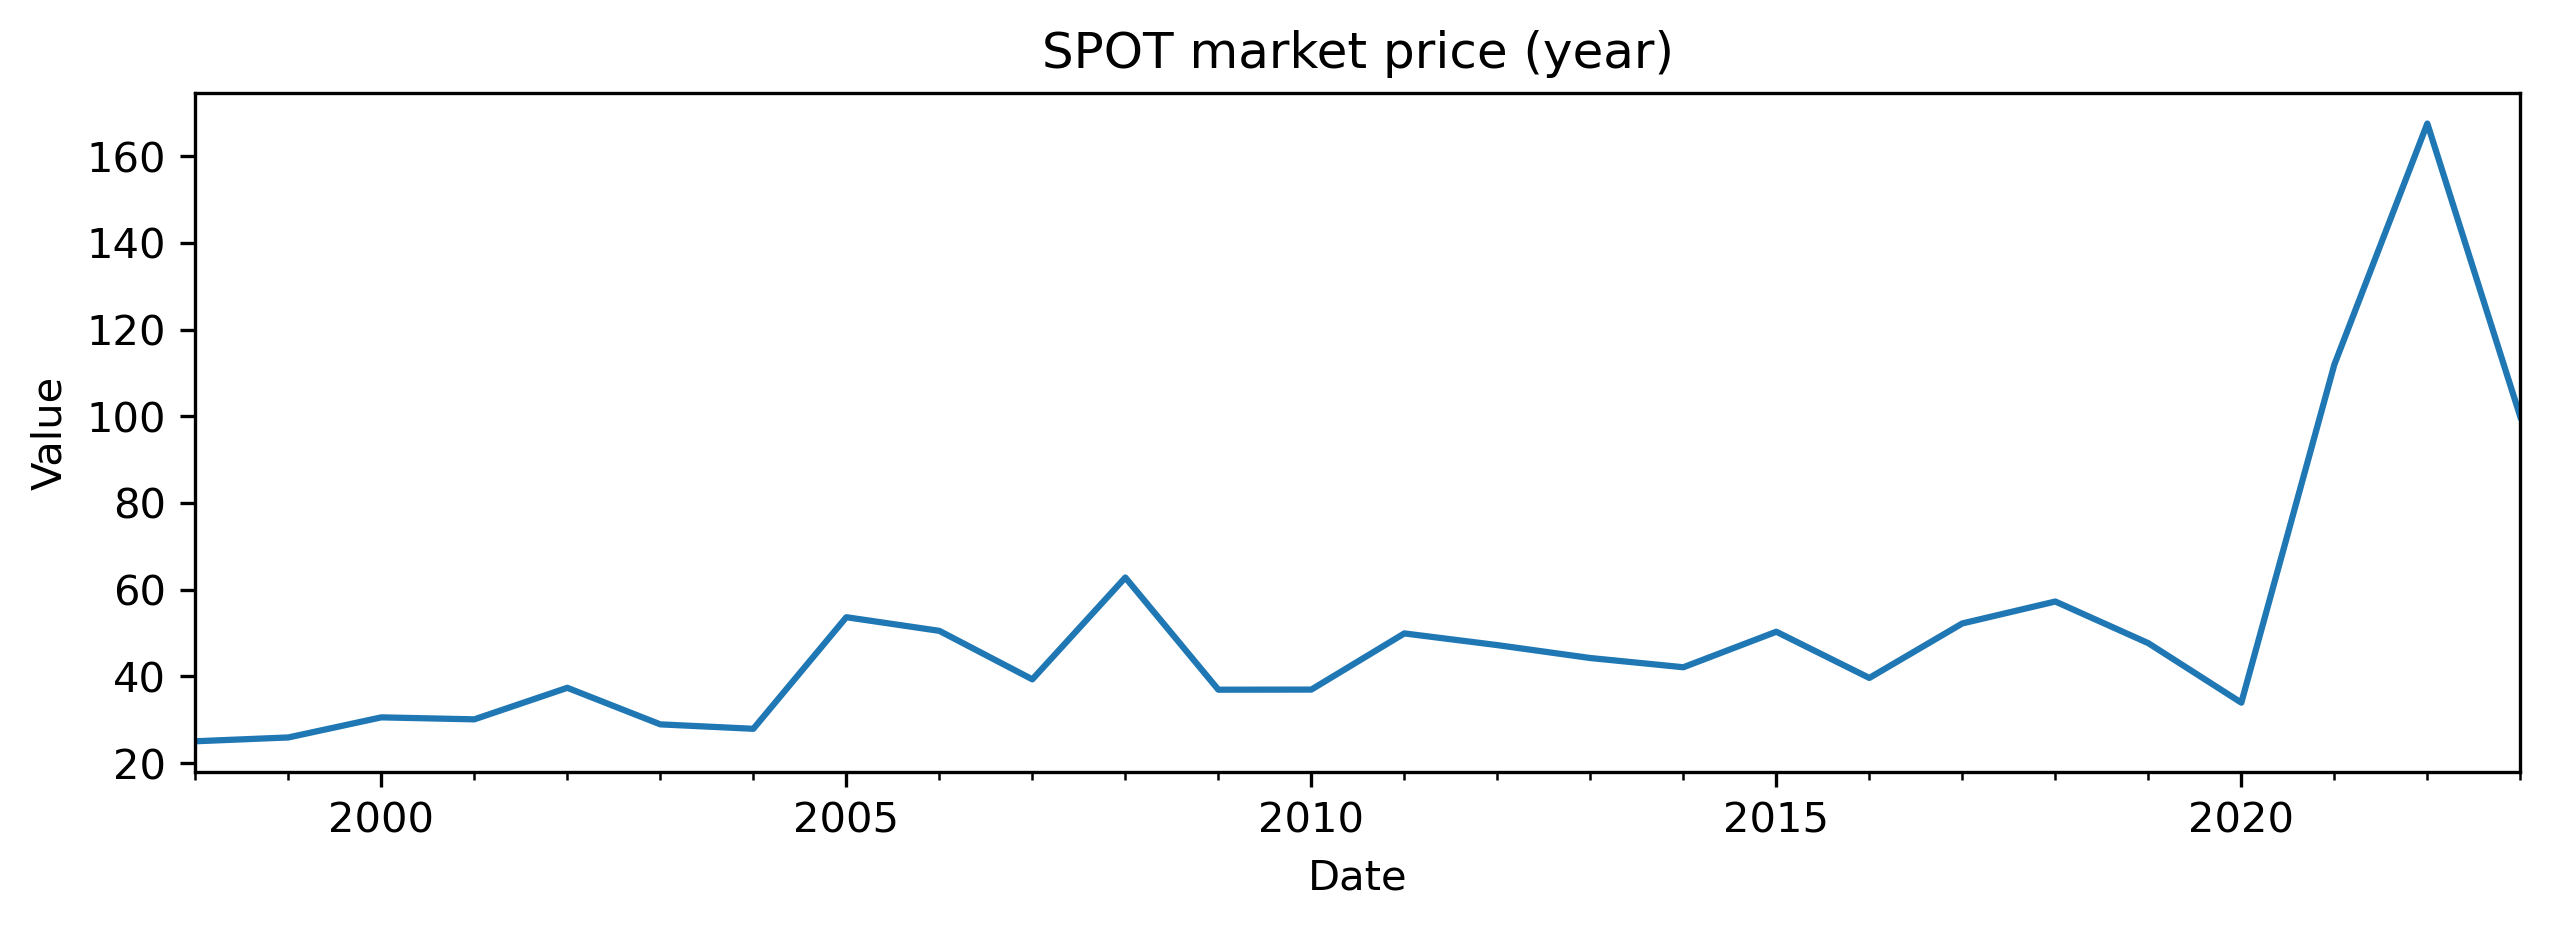

In [56]:
ax = omie_price_yearly.plot(figsize=(10, 3))
ax.set_xlabel("Date")
ax.set_ylabel("Value (euros per MW hour)")
ax.set_title("SPOT market price (year)")

<AxesSubplot:xlabel='DATE'>

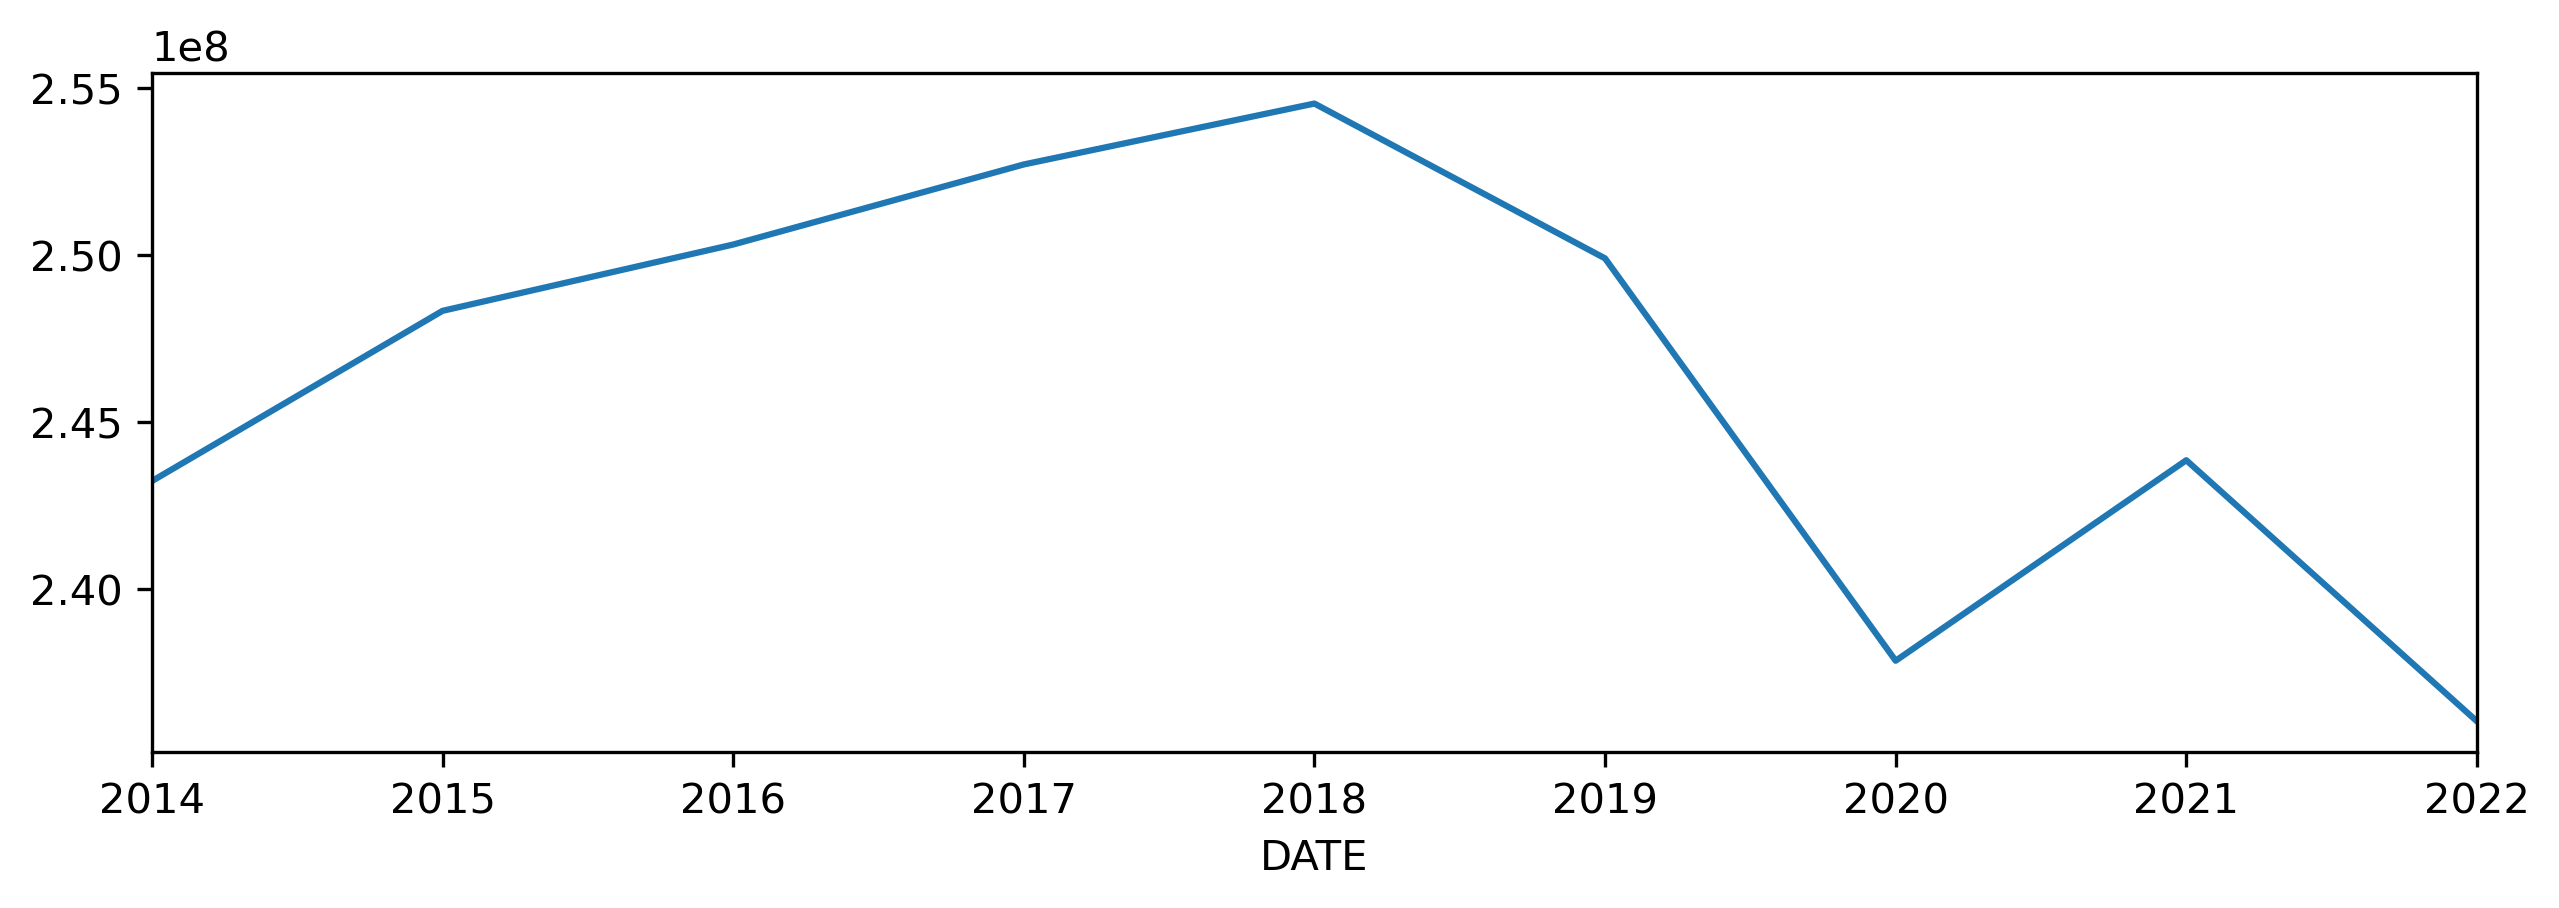

In [57]:
esios_demand_yearly.plot(figsize=(10, 3))

['GENERACIÓN_MEDIDA_TOTAL', 'GENERACIÓN_MEDIDA_EÓLICA', 'GENERACIÓN_MEDIDA_HIDRÁULICA', 'GENERACIÓN_MEDIDA_NUCLEAR', 'GENERACIÓN_MEDIDA_SOLAR', 'GENERACIÓN_MEDIDA_CICLO_COMBINADO', 'GENERACIÓN_MEDIDA_CARBÓN']


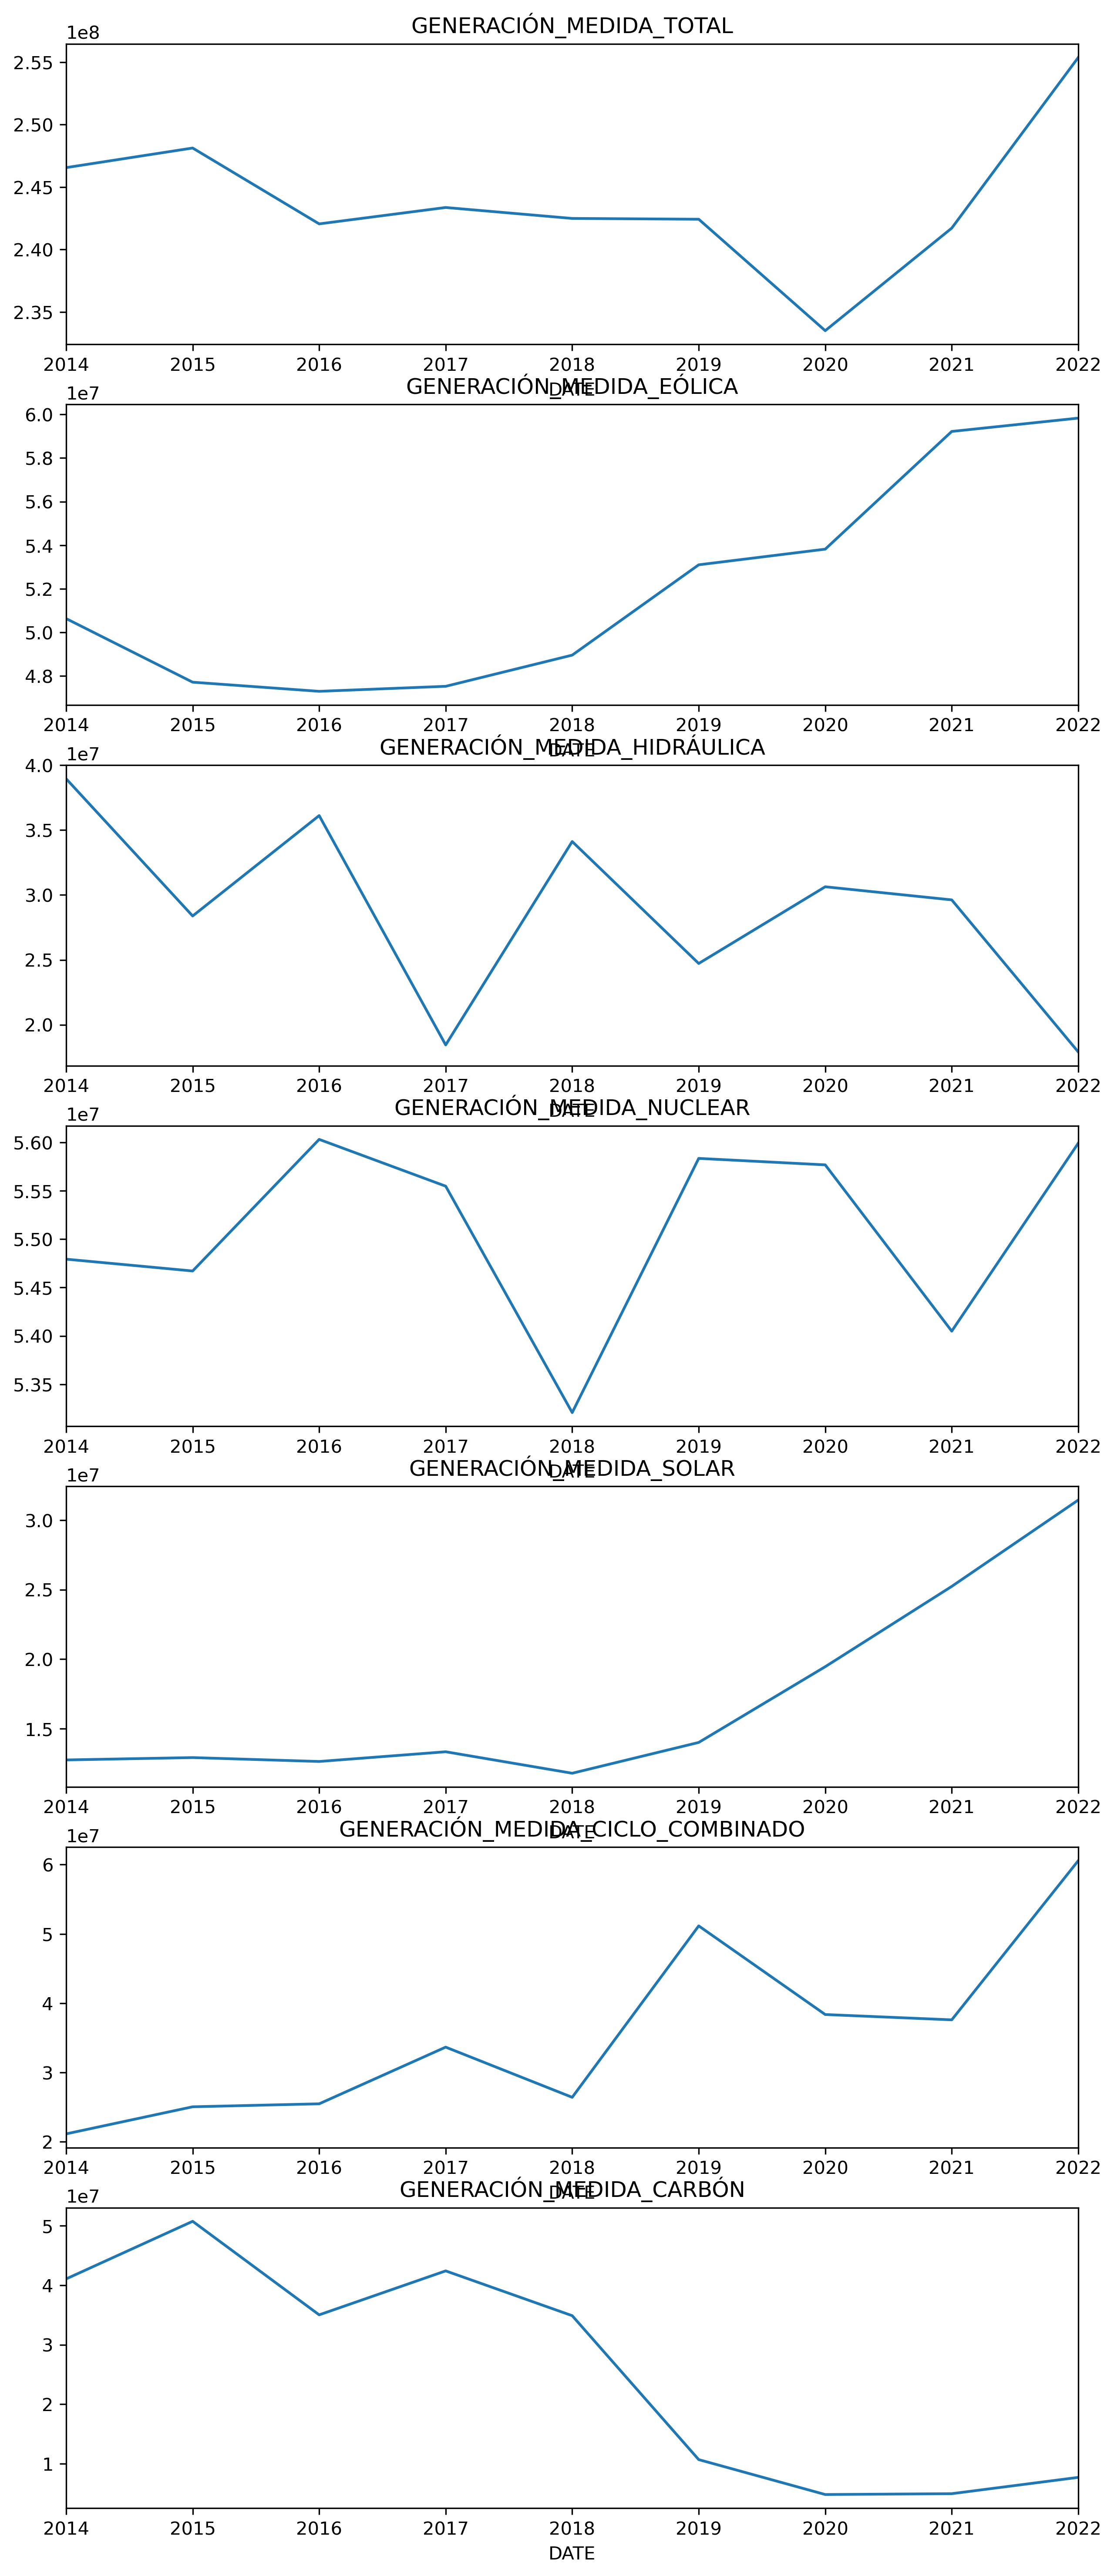

In [44]:
generation_technologies = esios_provider.get_tickers()[1:-1]
print(generation_technologies)

fig, axes = plt.subplots(nrows=len(generation_technologies))
for i, name in enumerate(generation_technologies):
    esios_df_sum_yearly.iloc[:,i+1].plot(figsize=(10, 25), ax=axes[i], title=name)

Text(0.5, 1.0, 'Wind power generation')

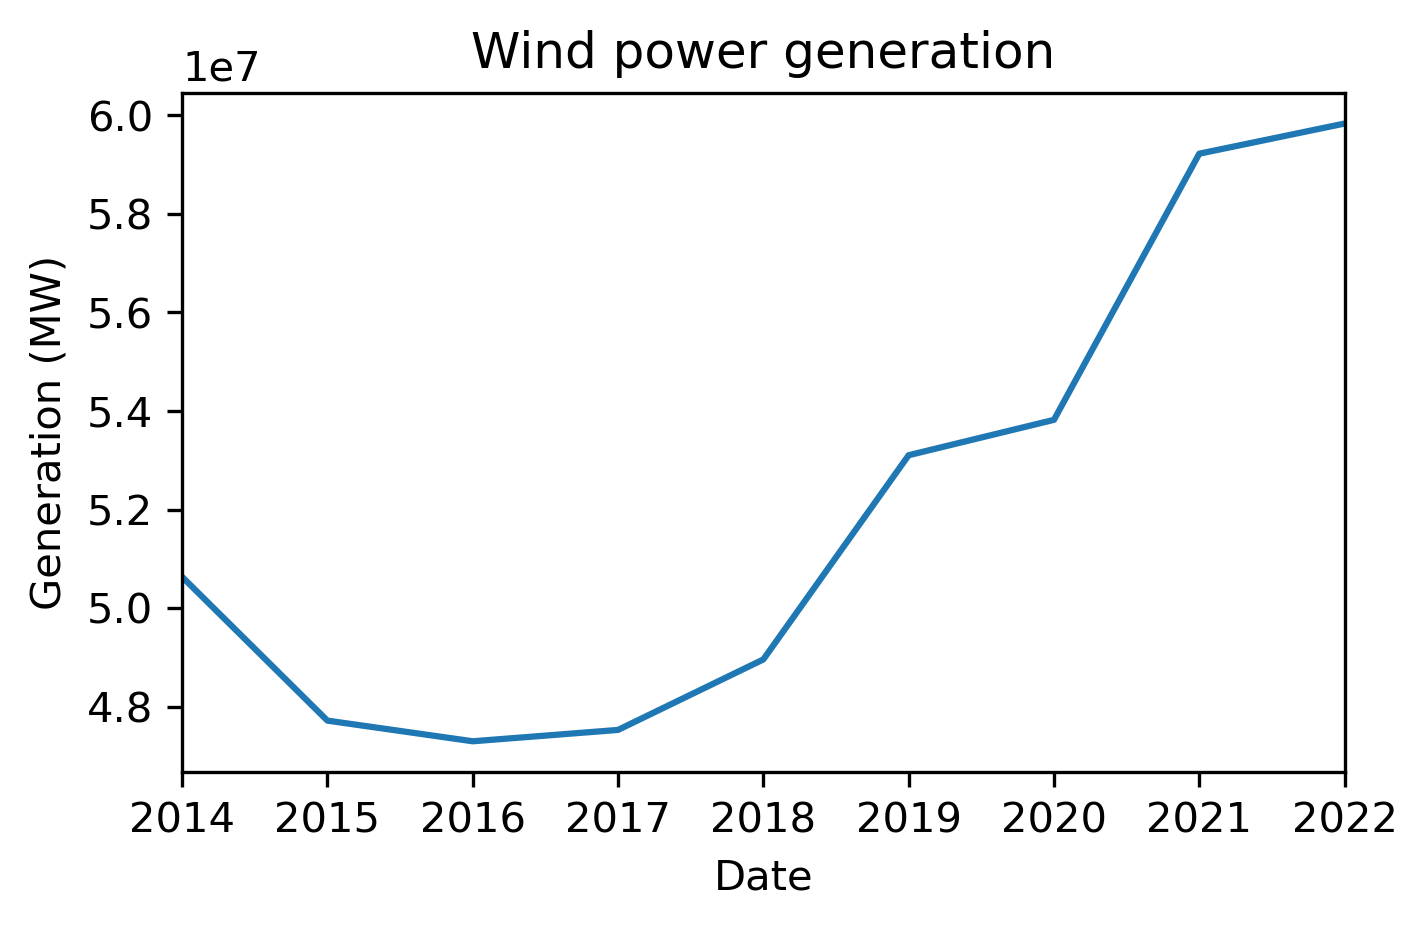

In [67]:
ax = esios_df_sum_yearly.iloc[:,2].plot(figsize=(5, 3))
ax.set_xlabel("Date")
ax.set_ylabel("Generation (MW)")
ax.set_title("Wind power generation")

Text(0.5, 1.0, 'Solar generation')

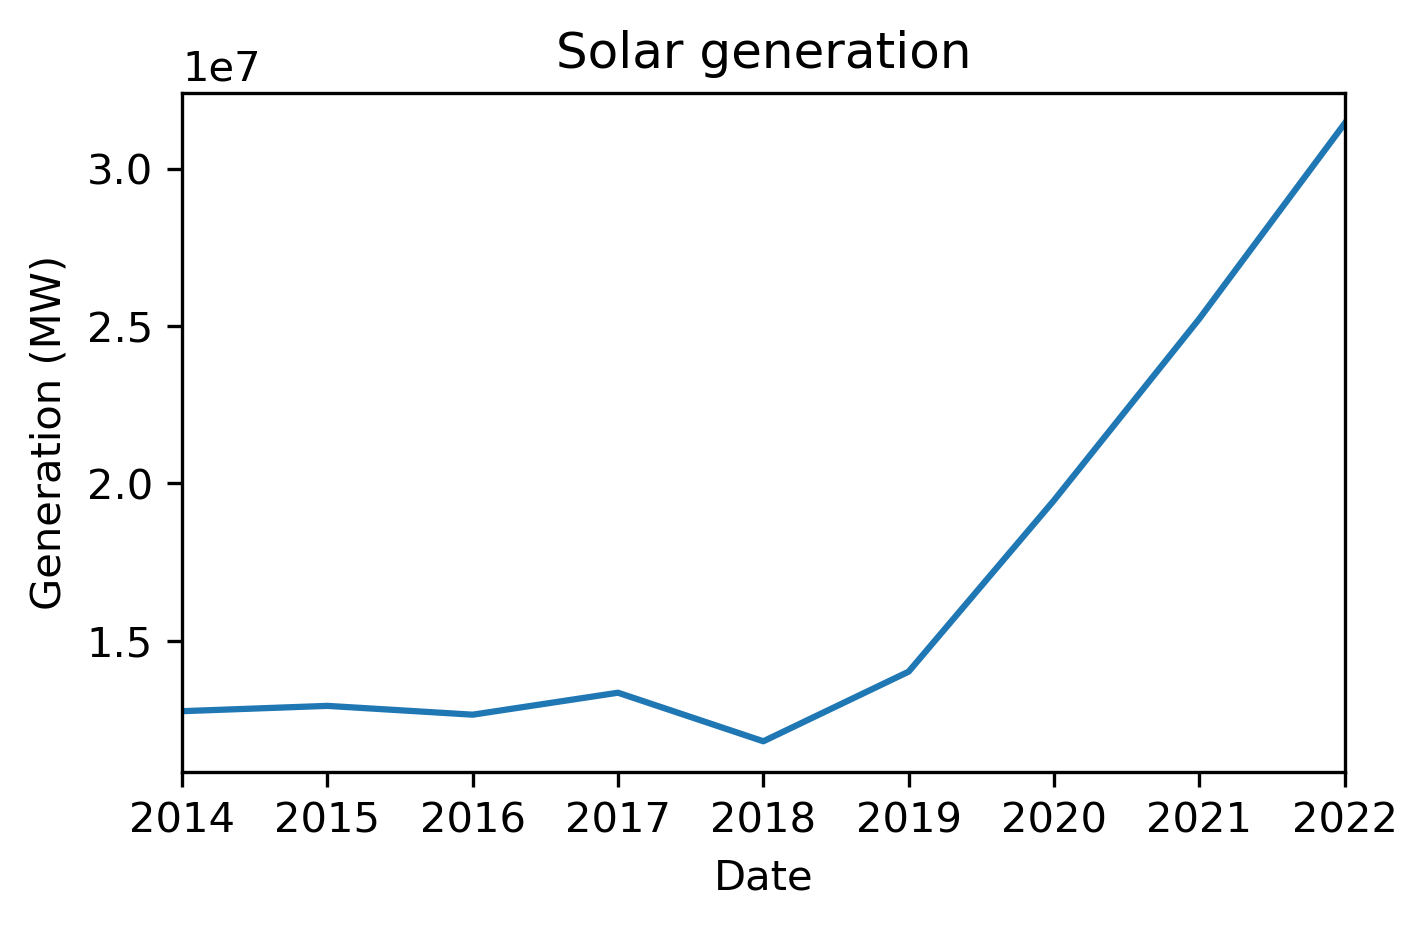

In [68]:
ax = esios_df_sum_yearly.iloc[:,5].plot(figsize=(5, 3))
ax.set_xlabel("Date")
ax.set_ylabel("Generation (MW)")
ax.set_title("Solar generation")

Text(0.5, 1.0, 'Combined cycle generation')

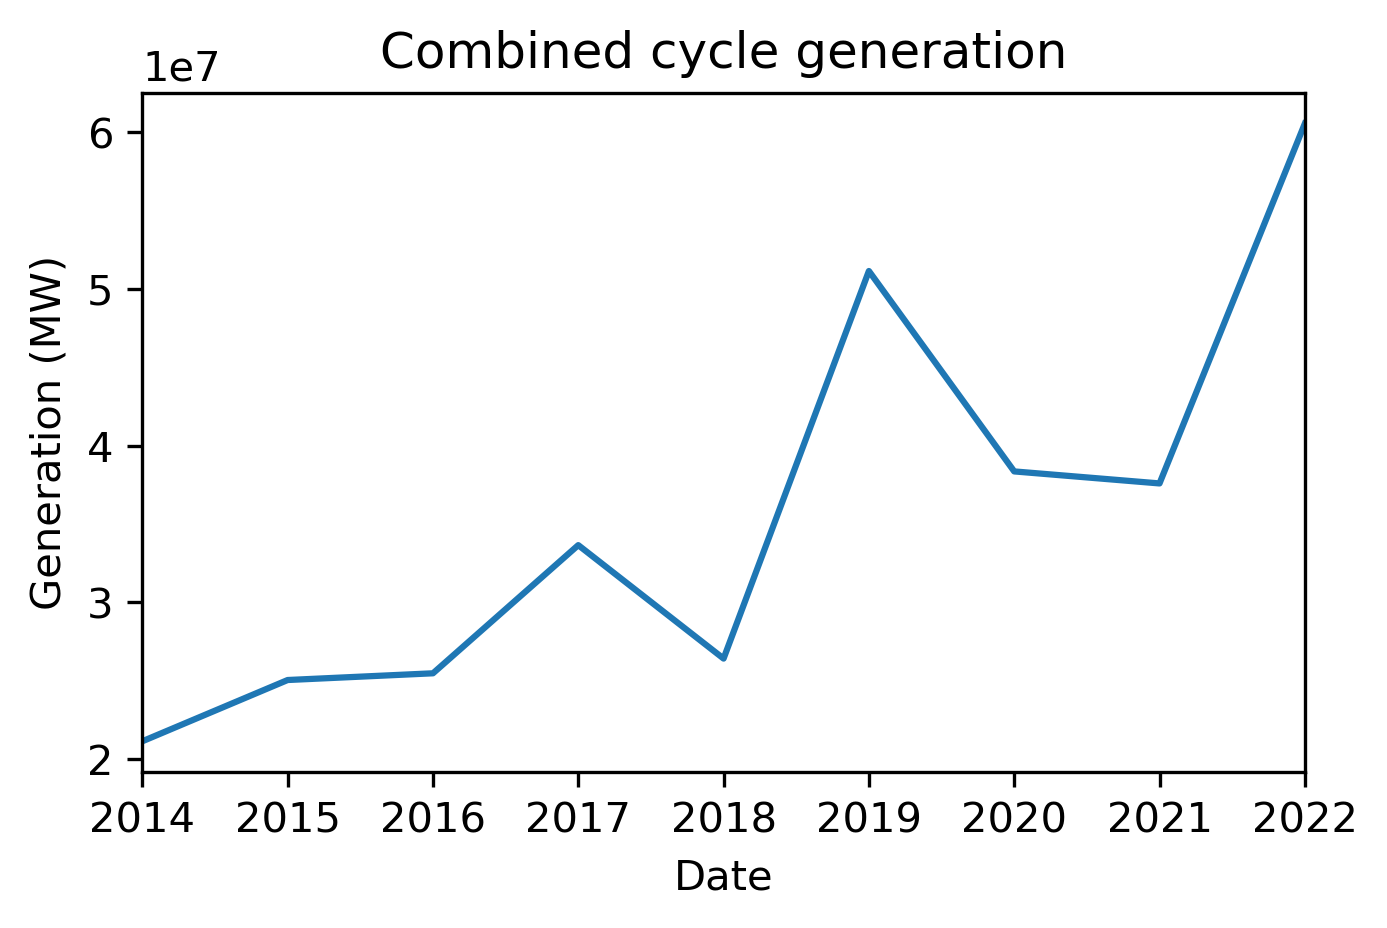

In [69]:
ax = esios_df_sum_yearly.iloc[:,6].plot(figsize=(5, 3))
ax.set_xlabel("Date")
ax.set_ylabel("Generation (MW)")
ax.set_title("Combined cycle generation")

Text(0.5, 1.0, 'Coal generation')

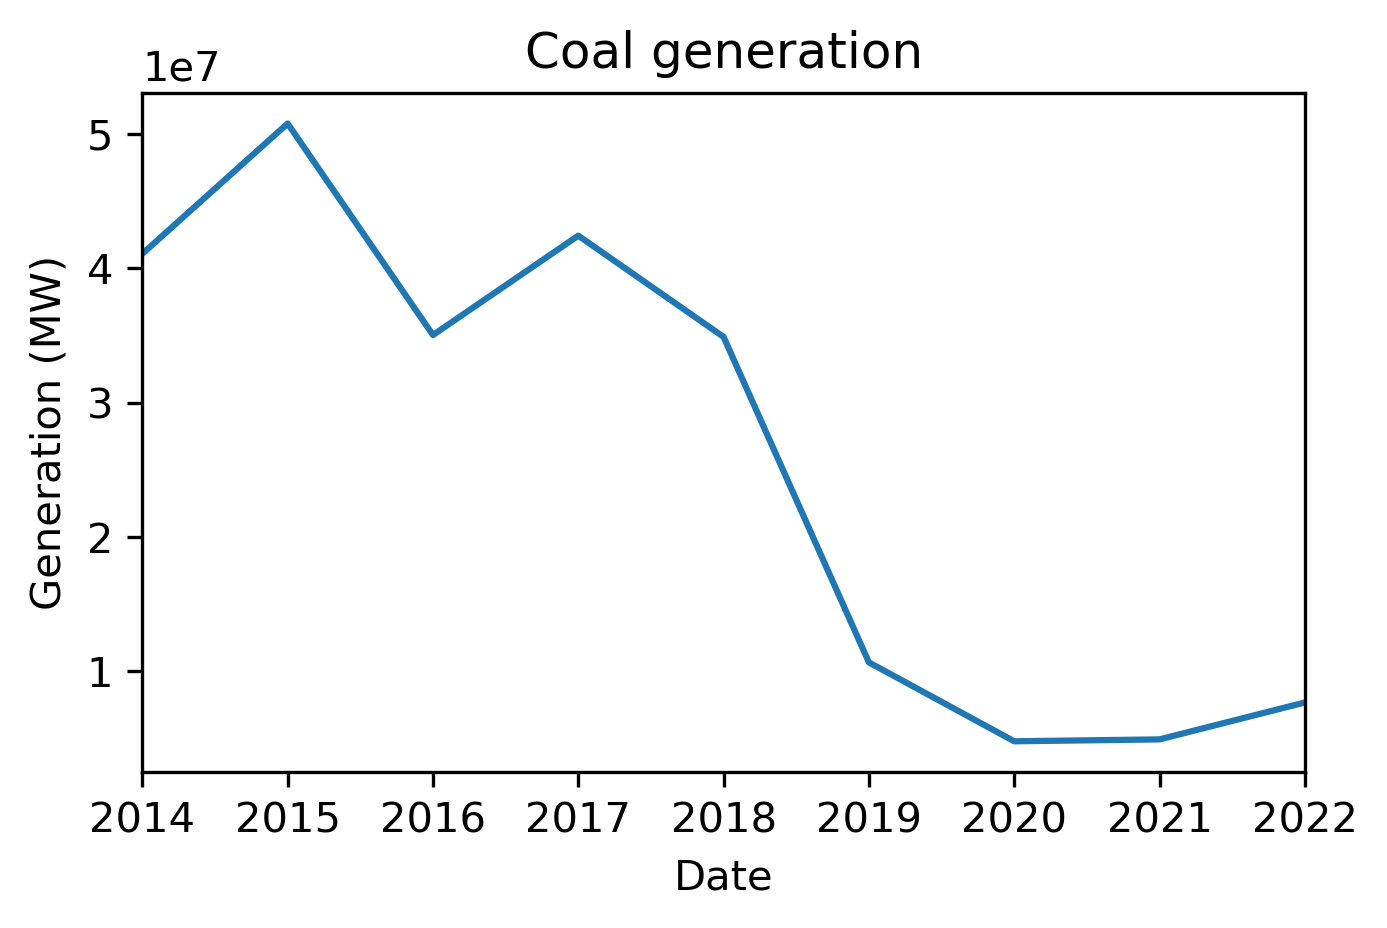

In [70]:
ax = esios_df_sum_yearly.iloc[:,7].plot(figsize=(5, 3))
ax.set_xlabel("Date")
ax.set_ylabel("Generation (MW)")
ax.set_title("Coal generation")

In [62]:
tickers = ["DAILY_TTF_PRICE", "MONTHLY_TTF_PRICE"]
ttf_daily_provider = GenericDataProvider("datalake/clean/investingdotcom/", want_metadata=False, tickers=tickers)

ttf_price_yearly = ttf_daily_provider.get_series("MONTHLY_TTF_PRICE", freq="M", resample_by="Y", group_mode="mean")

Text(0.5, 1.0, 'TTF gas price (per year)')

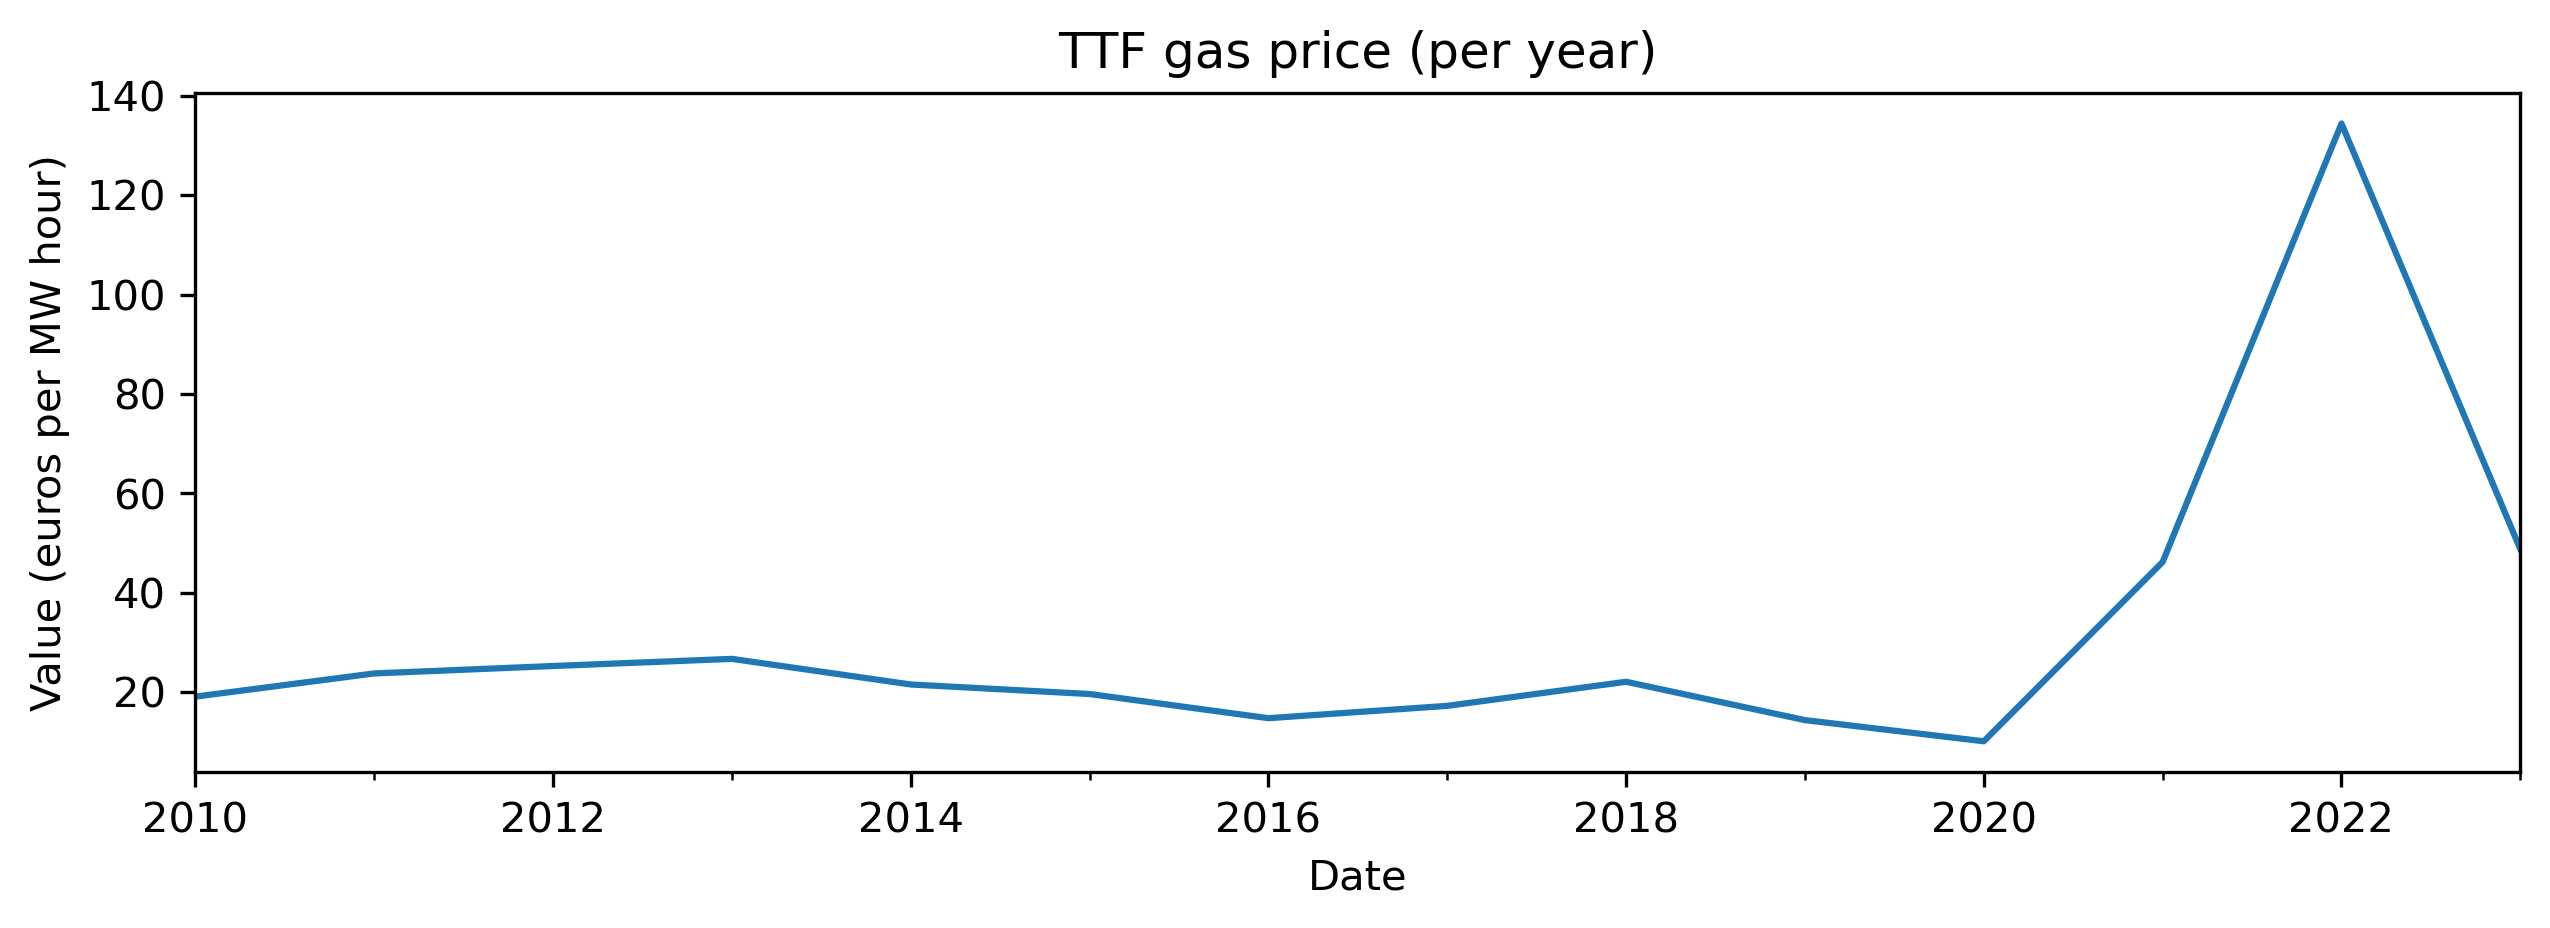

In [63]:
ax = ttf_price_yearly.plot(figsize=(10, 3))
ax.set_xlabel("Date")
ax.set_ylabel("Value (euros per MW hour)")
ax.set_title("TTF gas price (per year)")

In [64]:
coal_daily_provider = GenericDataProvider("datalake/clean/marketwatch/", want_metadata=False, tickers="DAILY_COAL_PRICE")

coal_price_yearly = coal_daily_provider.get_series("DAILY_COAL_PRICE", freq="D", resample_by="Y", group_mode="mean")

Text(0.5, 1.0, "Argus McCloskey's coal price (per year)")

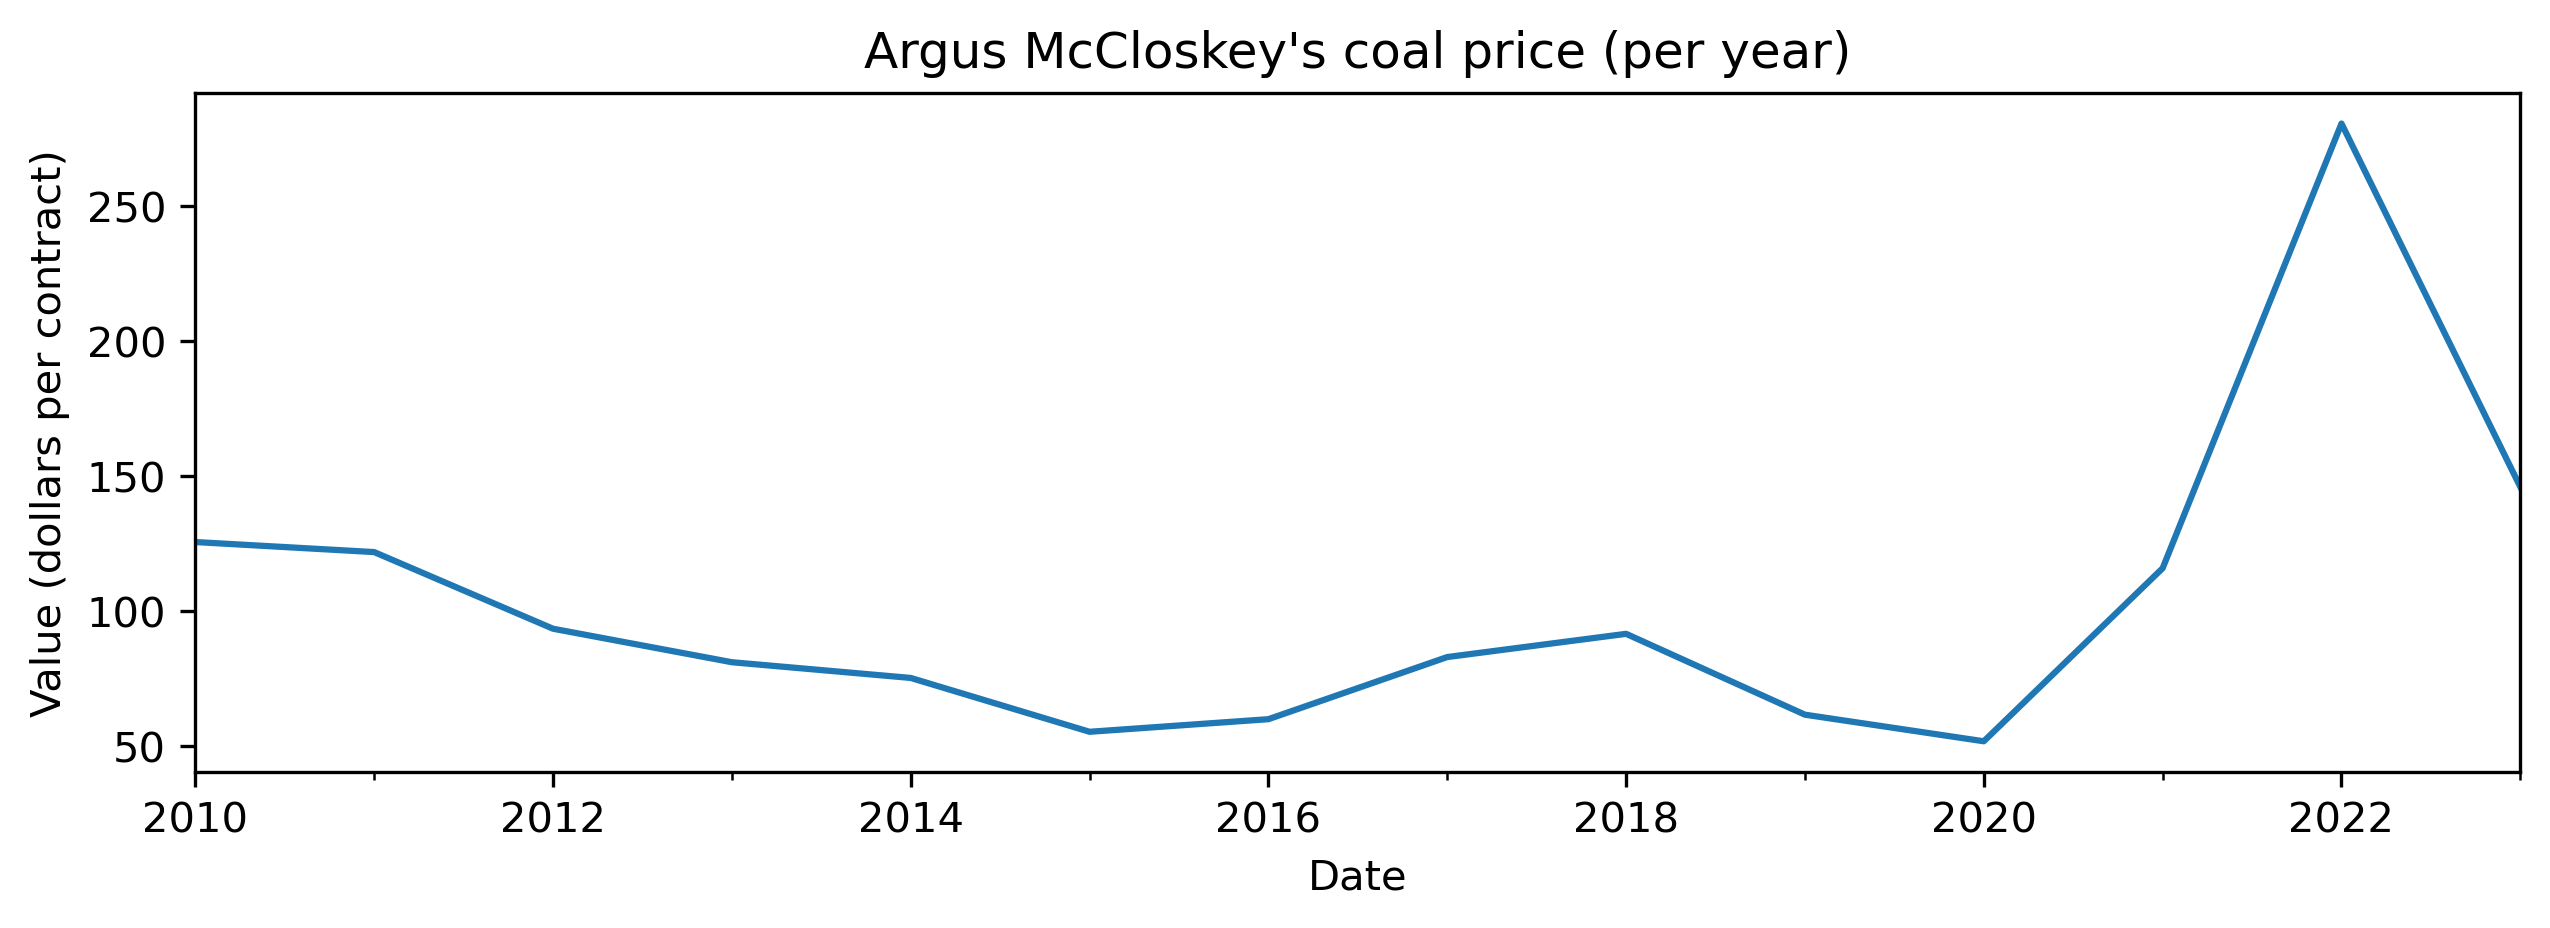

In [65]:
ax = coal_price_yearly.plot(figsize=(10, 3))
ax.set_xlabel("Date")
ax.set_ylabel("Value (dollars per contract)")
ax.set_title("Argus McCloskey's coal price (per year)")

In [49]:
co2_daily_provider = GenericDataProvider("datalake/clean/ICAP/", want_metadata=False, tickers="CO2_EUA_PRICE")

co2_price_yearly = co2_daily_provider.get_series("CO2_EUA_PRICE", freq="D", resample_by="Y", group_mode="mean")

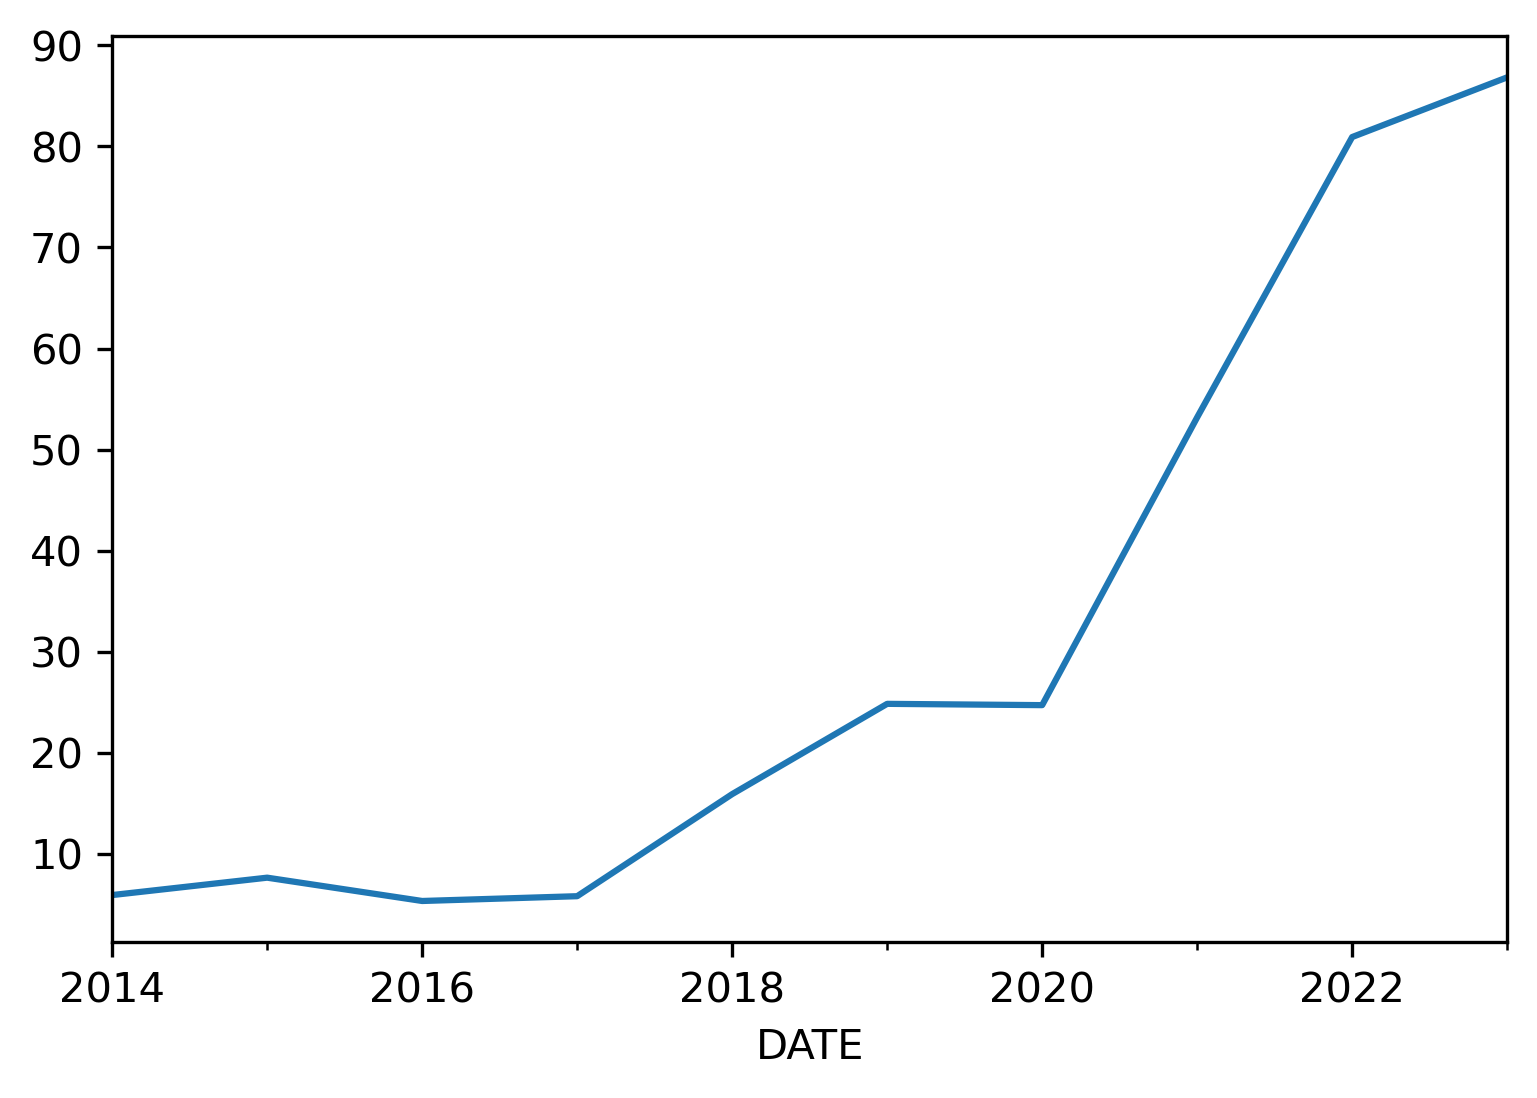

In [50]:
ax = co2_price_yearly.loc['2014-01-01':'2023-03-01'].plot()